Project1 - Analyzing Amazon Sales Data

Name - Rishabh

In [82]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load the Dataset
data = pd.read_csv('D:/Unified mentor projects/Amazon sales data analysis/Amazon Sales data.csv')

In [83]:
#First five rows of the dataset using head() function
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


Data Cleaning

In [84]:
#Check the missing values
missing_values = data.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


There is no null values the data is already cleaned.

In [86]:
#Convet Order Date to datetime
data["Order Date"] = pd.to_datetime(data["Order Date"])

In [87]:
#Extract Year and Month from Order Date
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2


In [18]:
#Calculate the Number of Regions
regions = data["Region"].nunique()
print("Number of regions:",regions)

Number of regions: 7


There are 7 different Regions in our Dataset.

In [19]:
#Calculate the Number of Countries
country = data["Country"].nunique()
print("Number of country:",country)

Number of country: 76


There are 76 different Countries in our Dataset.

In [20]:
#Calculate the Item Types
item_type = data["Item Type"].nunique()
print("Number of item type:",item_type)

Number of item_type: 12


There are 12 different Item Types in our Dataset.

In [23]:
#Calulate the Total Unit Sold
unit_sold = data["Units Sold"].sum()
print("Number of unit sold:",unit_sold)

Number of unit sold: 512871


In [24]:
#Calculate the Total Unit Cost
unit_cost = data["Unit Cost"].sum()
print("Number of unit cost:",unit_cost)

Number of unit cost: 19104.8


In [26]:
#Calculate the Total Revenue
total_revenue = data["Total Revenue"].sum()
print("Total revenue:",total_revenue)

Total revenue: 137348768.31


In [27]:
#Calculate the Total Cost
total_cost = data["Total Cost"].sum()
print("Total cost:",total_cost)

Total cost: 93180569.91000001


In [28]:
#Calculate the Total Profit
total_profit = data["Total Profit"].sum()
print("Total profit:",total_profit)

Total profit: 44168198.39999999


In [29]:
data.groupby(['Region','Sales Channel'])['Total Profit'].sum()

Region                             Sales Channel
Asia                               Offline          3584286.33
                                   Online           2529559.54
Australia and Oceania              Offline          1886283.82
                                   Online           2835876.21
Central America and the Caribbean  Offline          2475814.99
                                   Online            371092.86
Europe                             Offline          5574539.91
                                   Online           5508398.72
Middle East and North Africa       Offline          2169081.08
                                   Online           3592110.78
North America                      Offline          1457942.76
Sub-Saharan Africa                 Offline          7772777.78
                                   Online           4410433.62
Name: Total Profit, dtype: float64

As we can see Asia, Central America and the Caribbean, Europe and Sub-Saharan Africa are having more profit Offline and other are having more profit online.

North America only have offline option.

Data Visualisation

Text(0, 0.5, 'Total Revenue')

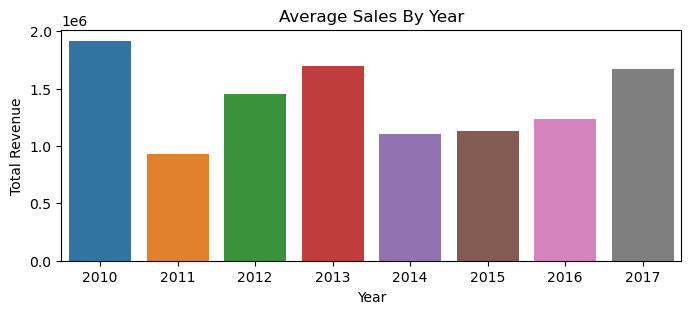

In [52]:
#Year wise sales
year_sales = data.groupby('Year')['Total Revenue'].mean()
plt.figure(figsize=(8,3))
sns.barplot(x=year_sales.index,y=year_sales.values,)
plt.title('Average Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')


Text(0.5, 1.0, 'Average Profit in Region Wise')

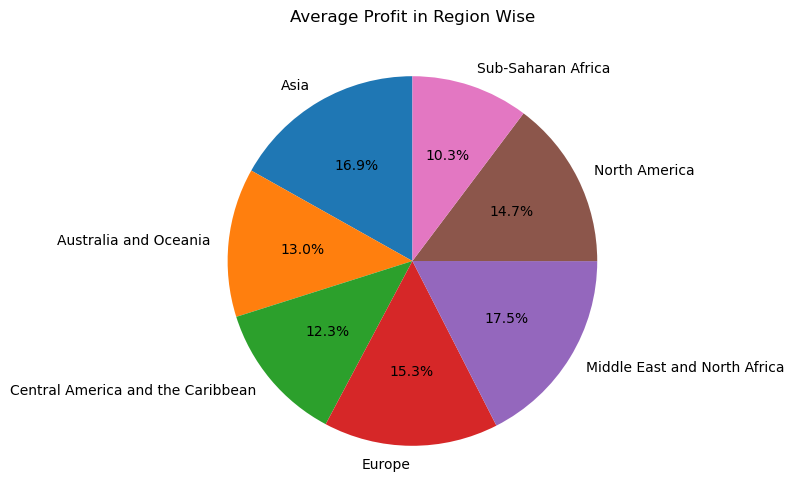

In [53]:
#Pie chart of Total Profit in region wise
plt.figure(figsize=(6,6))
region_TotalRevenue = data.groupby('Region')['Total Profit'].mean()
plt.pie(region_TotalRevenue,startangle=90,labels=region_TotalRevenue.index, autopct='%1.1f%%')
plt.title('Average Profit in Region Wise')

In [54]:
#Group Total Revenue by Item Type
TotalRevenue_ItemType = data.groupby('Item Type')['Total Revenue'].sum()

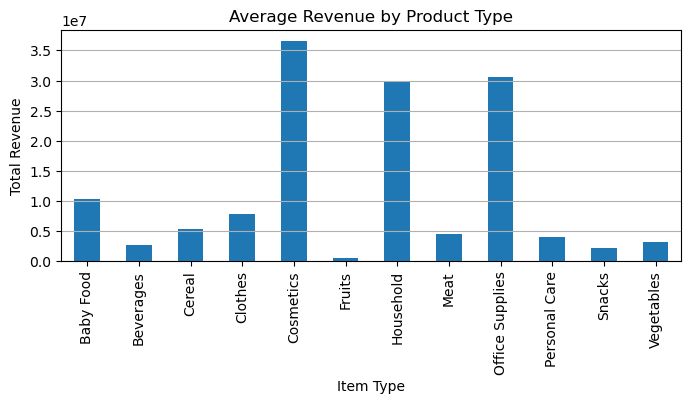

In [62]:
#Bar chart for Total Revenue by Item Type
plt.figure(figsize=(8,3))
TotalRevenue_ItemType.plot(kind='bar')
#sns.barplot(x=TotalRevenue_ItemType.index,y=TotalRevenue_ItemType.values,)
plt.title('Average Revenue by Product Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.grid(axis='y')


In [63]:
#Group Total Revenue by Sales Channel
TotalRevenue_SalesChannel = data.groupby('Sales Channel')['Total Revenue'].mean()

Text(0.5, 1.0, 'Total Revenue By Sales Channel')

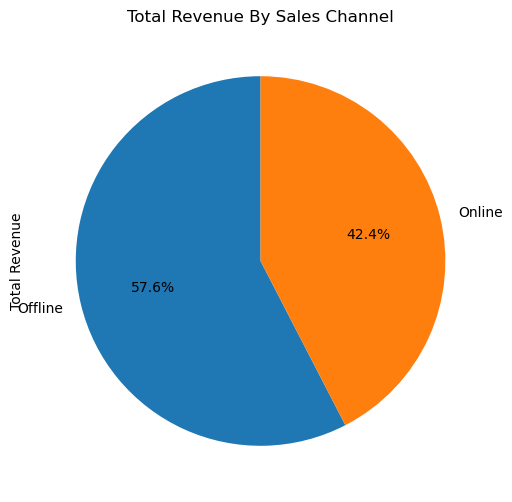

In [67]:
#Bar chart for Group Total Revenue by Sales Channel
plt.figure(figsize=(6,6))
plt.tight_layout()
TotalRevenue_SalesChannel.plot(kind='pie',startangle=90,autopct='%1.1f%%')
#plt.pie(TotalRevenue_SalesChannel,startangle=90,labels=TotalRevenue_SalesChannel.index, autopct='%1.1f%%')
plt.title('Total Revenue By Sales Channel')

(-1.0999999530116766,
 1.0999990132545812,
 -1.0999995737000883,
 1.0999999797000042)

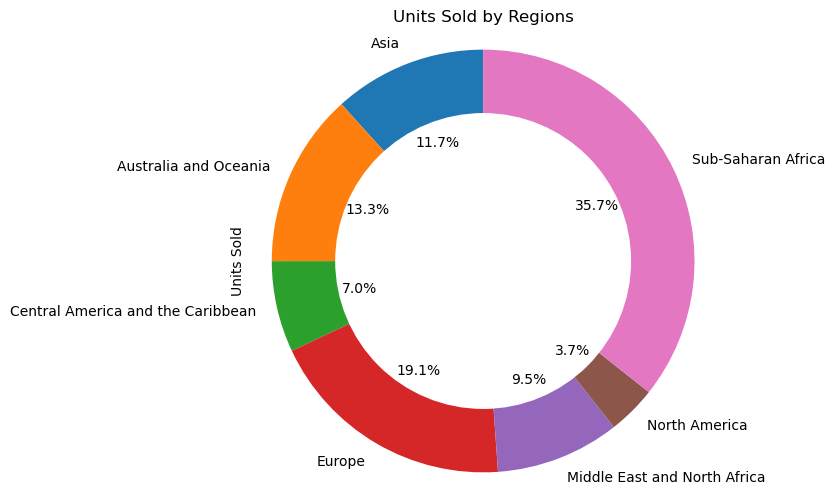

In [75]:
#Create a Pie chart for a Donut chart
Region_UnitSold = data.groupby('Region')['Units Sold'].sum()
plt.figure(figsize=(6,6))
Region_UnitSold.plot(kind='pie', labels=Region_UnitSold.index, autopct='%1.1f%%', startangle=90)

#Draw a circle at the centre of the pie chart
cntr_circle = plt.Circle((0,0),(0.70),fc='white')
fig = plt.gcf()
fig.gca().add_artist(cntr_circle)

#Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Units Sold by Regions')
plt.axis('equal')

In [92]:
# Group units sold by year and month
YearMonth_UnitsSold = data.groupby(['Year','Month'])['Units Sold'].sum()

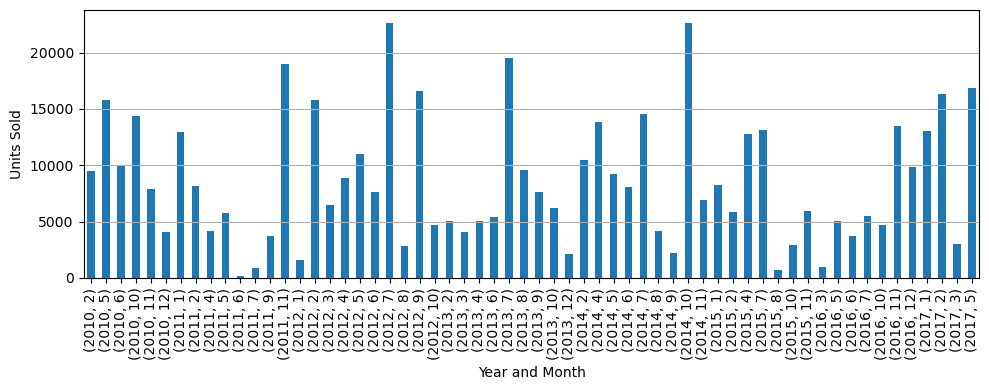

In [97]:
# Create a bar chart for units sold by year and month
plt.figure(figsize=(10,4))
YearMonth_UnitsSold.plot(kind='bar')
plt.xlabel('Year and Month')
plt.ylabel('Units Sold')
plt.tight_layout()
plt.grid(axis='y')

In [98]:
# group Total cost by Sales Channel
TotalCost_SalesChannel = data.groupby('Sales Channel')['Total Cost'].sum()

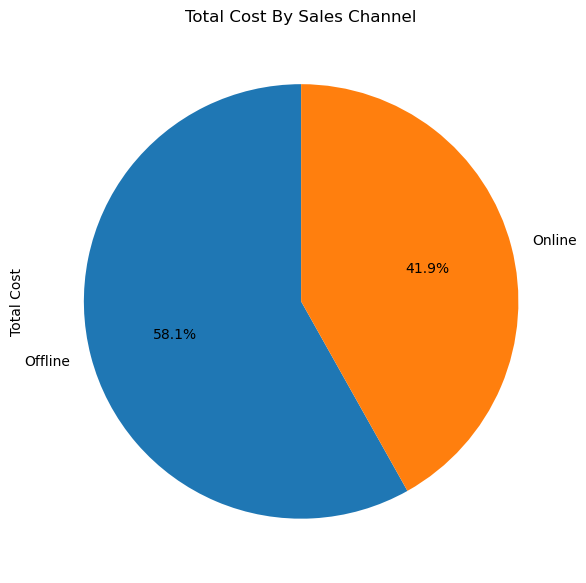

In [99]:
# Bar chart for Total cost by Sales Channel
plt.figure(figsize=(6,6))
TotalCost_SalesChannel.plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Total Cost By Sales Channel')
plt.tight_layout()